Title:
Sentiment Analysis on the earnings of Tesla Company by analyzing the Tweets associated to Tesla.

In [4]:
# Import the libraries
import tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [29]:
consumerKey = confidential
consumerSecret  = confidential
accessToken = confidential
accessTokenSecret  = confidential

In [30]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [73]:
# Gather 1500 tweets about Tesla Earnings

# Create a search term
search_term = 'Tesla earnings'

# Create the cursor object

tweets = tweepy.Cursor(api.search, 
                       q = search_term,
                       lang = 'en',
                       since = '2022-04-30',
                       tweet_mode = 'extended').items(1500)

#Store the tweets
all_tweets = [tweet.full_text for tweet in tweets]

# Show all the tweets
all_tweets


['Zillow, Redfin, and Opendoor Earnings Are Coming. 3 Things to Watch.-\n\nhttps://t.co/coBiE0llhJ',
 'Tesla Earnings: What to Look For From TSLA\n\nTesla (TSLA) reports Q4 earnings after market close on Jan. 26. Can it keep profits rising as revenue growth slows? https://t.co/FwI8P4wSU1',
 "Strategy shift? Biden hunts for oil refining capacity in America.\n\nTop 25 stocks that are down big but have improving earnings - Credit Suisse.\n\nMusk: Bill Gates still has a 'multi-billion dollar' Tesla (TSLA) short position.",
 "@MissJilianne @TeslaDiva99 @WholeMarsBlog @99brownKaryl @Tesla @elonmusk @Kristennetten @R6Alex @atk0506 @PauljHorton @Amy_Sober @WestTeslarado @TeslaJoy @WhatsupFranks @blueskykites @techAU It would be gone quick. And is also not in the best interest of Tesla since it would reduce supercharger earnings. Isn't it common sense?",
 '@Tesla @elonmusk package of $23b is likely @Tesla net earnings for its first 20-25 years of existence.  Let’s let the shareholders eat sh**!

In [74]:
# Create a datframe to store the tweets
df = pd.DataFrame(all_tweets, columns = ['Tweets'])
# Show the first 6 rows of data
df.head(6)

,Tweets
0,"Zillow, Redfin, and Opendoor Earnings Are Comi..."
1,Tesla Earnings: What to Look For From TSLA\n\n...
2,Strategy shift? Biden hunts for oil refining c...
3,@MissJilianne @TeslaDiva99 @WholeMarsBlog @99b...
4,@Tesla @elonmusk package of $23b is likely @Te...
5,RT @realalexvieira: Record Oil Prices Today. T...


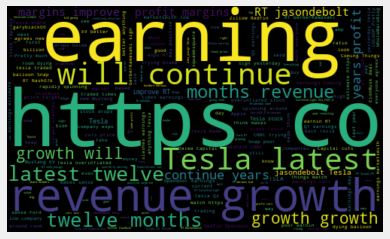

In [75]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [76]:
# Create a function to clean the tweets
def cleanTwt(twt):
 twt = re.sub('@[A-Za-z0–9]+', '', twt) #Removing @mentions
 twt = re.sub('#', '', twt) # Removing '#' hash tag
 twt = re.sub('RT[\s]+', '', twt) # Removing RT
 twt = re.sub('\\n', '', twt)
 twt = re.sub('@[\S]*', '',twt) # remove @ mentions
 twt = re.sub('^[\S]+|[\S] + $', '', twt) # removing leading and trailing whitespaces
 twt = re.sub('https?:\/\/\S+', '', twt) # Removing hyperlink
 
 return twt

In [77]:
# Create a new column called Cleaned tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)

In [78]:
#show df
df

,Tweets,Cleaned_Tweets
0,"Zillow, Redfin, and Opendoor Earnings Are Comi...","Redfin, and Opendoor Earnings Are Coming. 3 T..."
1,Tesla Earnings: What to Look For From TSLA\n\n...,Earnings: What to Look For From TSLATesla (TS...
2,Strategy shift? Biden hunts for oil refining c...,shift? Biden hunts for oil refining capacity ...
3,@MissJilianne @TeslaDiva99 @WholeMarsBlog @99b...,6Alex 506 _Sober It would be gone...
4,@Tesla @elonmusk package of $23b is likely @Te...,package of $23b is likely net earnings for ...
...,...,...
525,"Zillow, Redfin, and Opendoor Earnings Are Comi...","Redfin, and Opendoor Earnings Are Coming. 3 T..."
526,one of my gf's colleague told her Tesla's shar...,of my gf's colleague told her Tesla's share p...
527,RT @CalixStarlight: @Eka_FOOF_A @BriannaWu The...,_FOOF_A They just made a profit on their car...
528,RT @CalixStarlight: @Eka_FOOF_A @BriannaWu The...,_FOOF_A They just made a profit on their car...


In [79]:
# Create a new dataframe
df = pd.DataFrame(df['Cleaned_Tweets'], columns= ['Cleaned_Tweets'])
# Remove any duplicate rows
df.drop_duplicates(inplace = True)
idx = list(range(0, len(df)))
df = df.set_index(pd.Index(idx))
df

,Cleaned_Tweets
0,"Redfin, and Opendoor Earnings Are Coming. 3 T..."
1,Earnings: What to Look For From TSLATesla (TS...
2,shift? Biden hunts for oil refining capacity ...
3,6Alex 506 _Sober It would be gone...
4,package of $23b is likely net earnings for ...
...,...
290,And everything you post about Tesla/Starlink...
291,There is such a thing that companies do calle...
292,Newsflash: ALL valuations are forward-looking...
293,of my gf's colleague told her Tesla's share p...


In [80]:
# Create a function to get the subjectivity
def getSubjectivity(twt):
   return TextBlob(twt).sentiment.subjectivity

In [81]:
# Create a function to get the polarity
def getPolarity(twt):
   return  TextBlob(twt).sentiment.polarity

In [82]:
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [83]:
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Cleaned_Tweets,Subjectivity,Polarity
0,"Redfin, and Opendoor Earnings Are Coming. 3 T...",0.000000,0.000000
1,Earnings: What to Look For From TSLATesla (TS...,0.000000,0.000000
2,shift? Biden hunts for oil refining capacity ...,0.229630,-0.051852
3,6Alex 506 _Sober It would be gone...,0.375000,0.283333
4,package of $23b is likely net earnings for ...,0.458333,0.234375
...,...,...,...
290,And everything you post about Tesla/Starlink...,0.302778,0.066667
291,There is such a thing that companies do calle...,0.583333,-0.350000
292,Newsflash: ALL valuations are forward-looking...,0.443750,0.037500
293,of my gf's colleague told her Tesla's share p...,0.000000,0.000000


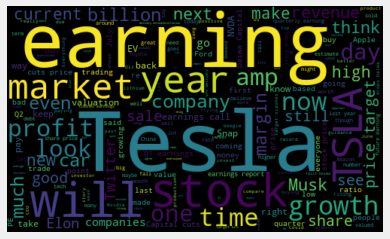

In [84]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Cleaned_Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [85]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    

In [86]:
# Create a column called Sentiment
df["Sentiment"] = df['Polarity'].apply(getSentiment)
df

,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,"Redfin, and Opendoor Earnings Are Coming. 3 T...",0.000000,0.000000,Neutral
1,Earnings: What to Look For From TSLATesla (TS...,0.000000,0.000000,Neutral
2,shift? Biden hunts for oil refining capacity ...,0.229630,-0.051852,Negative
3,6Alex 506 _Sober It would be gone...,0.375000,0.283333,Positive
4,package of $23b is likely net earnings for ...,0.458333,0.234375,Positive
...,...,...,...,...
290,And everything you post about Tesla/Starlink...,0.302778,0.066667,Positive
291,There is such a thing that companies do calle...,0.583333,-0.350000,Negative
292,Newsflash: ALL valuations are forward-looking...,0.443750,0.037500,Positive
293,of my gf's colleague told her Tesla's share p...,0.000000,0.000000,Neutral


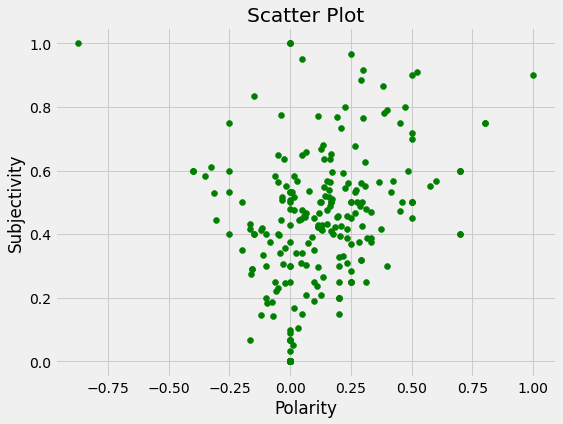

In [87]:
# Create a scatter plot of the subjectivity and polarity
plt.figure(figsize = (8,6))
for i in range(0, len(df)):
  plt.scatter(df['Polarity'][i], df["Subjectivity"][i], color = 'green')
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

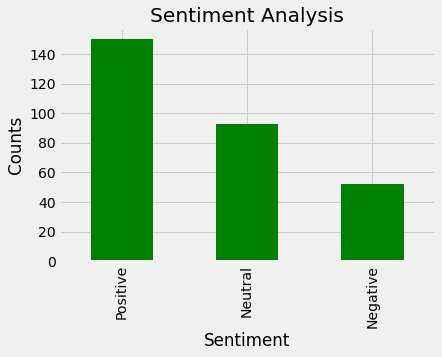

In [88]:
# Create a bar chart
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind = 'bar', color = 'green')
plt.show()